In [6]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# For saving the model
import joblib

# Set visualizations style
sns.set(style="whitegrid")
%matplotlib inline


In [8]:
# Load the dataset
data = pd.read_csv('Medical_insurance.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(data.head())

# Display dataset information
print("\nDataset Information:")
display(data.info())

# Display statistical summary
print("\nStatistical Summary:")
display(data.describe())

# Check for missing values
print("\nMissing Values:")
display(data.isnull().sum())


First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


None


Statistical Summary:


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010



Missing Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

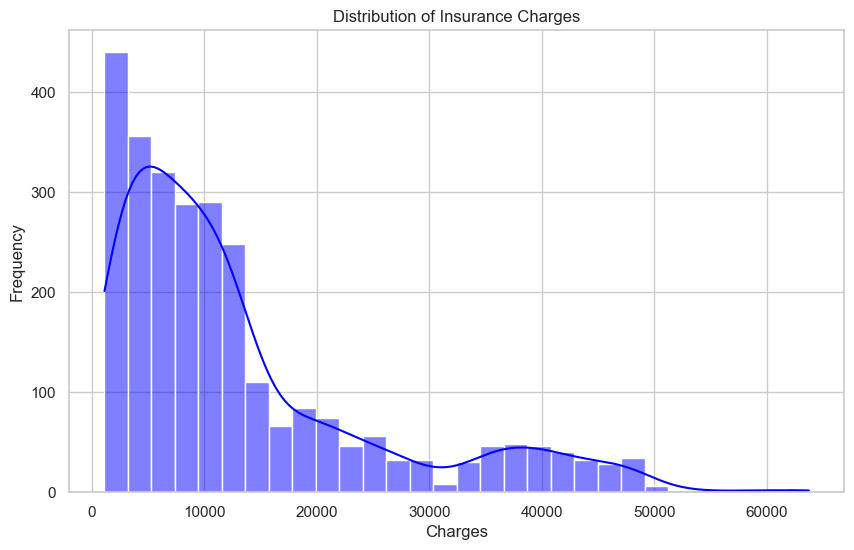

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data['charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


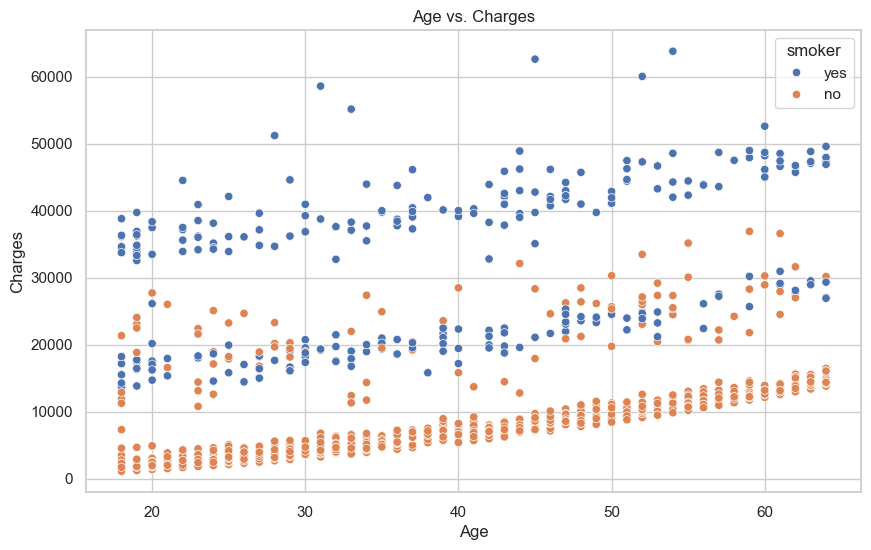

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


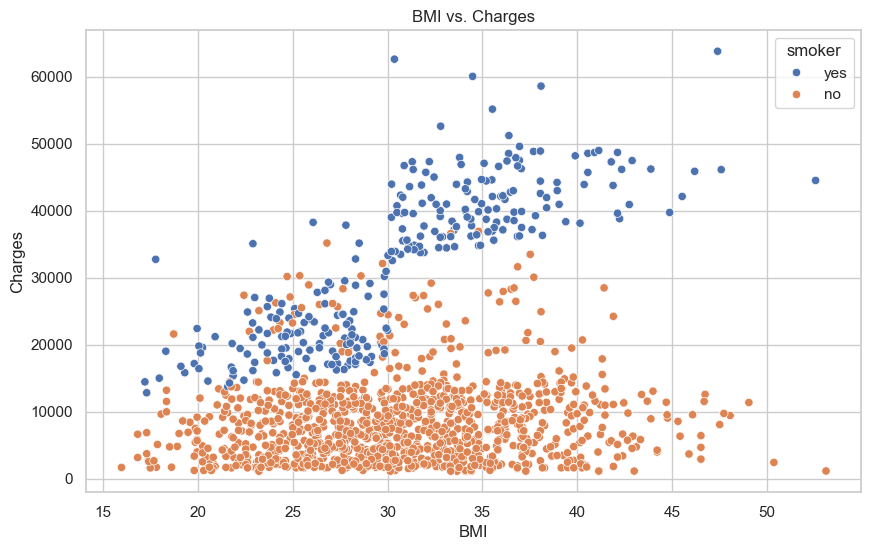

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_9792\3848908046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')


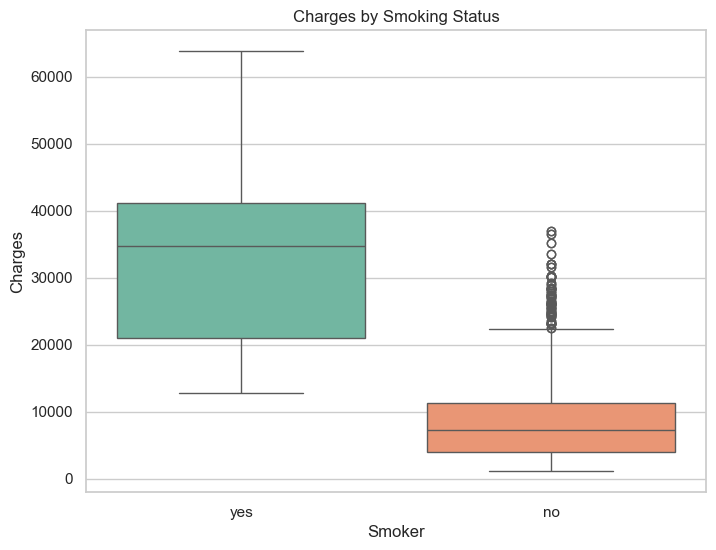

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


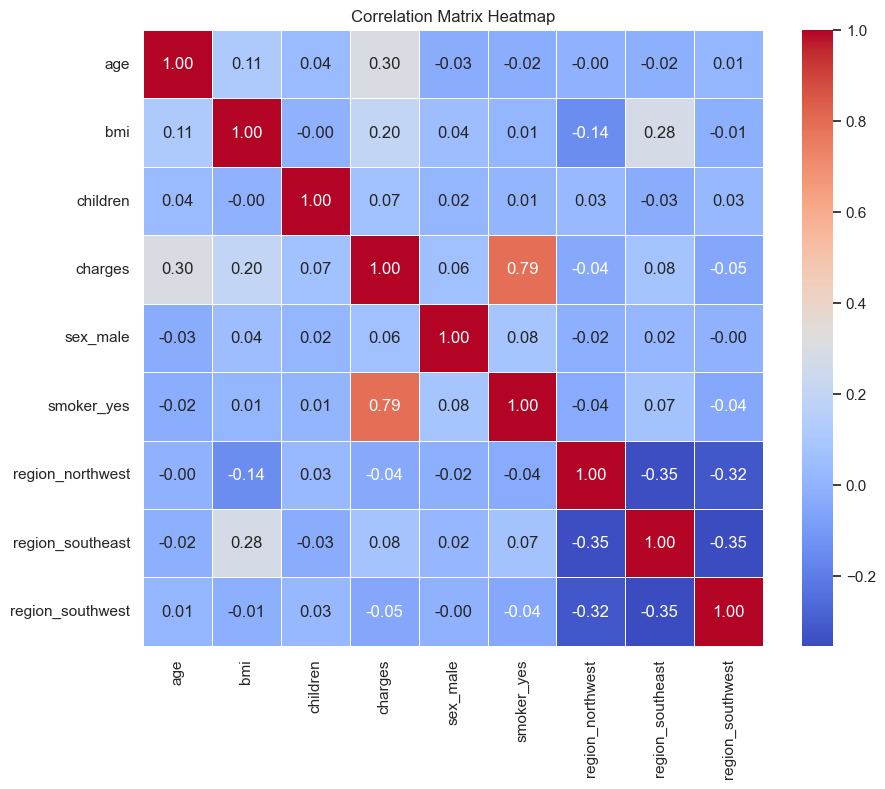

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (make sure to load your own insurance dataset here)
df = pd.read_csv('Medical_insurance.csv')

# Convert categorical variables to numeric
# Option 1: Using pd.get_dummies()
df_encoded = pd.get_dummies(df, drop_first=True)

# Display first few rows of the encoded dataset to verify
print(df_encoded.head())

# Create correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [14]:
# Define feature columns
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Define the transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # drop='first' to avoid dummy variable trap
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [15]:
# Define features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2217, 6)
Testing set size: (555, 6)


In [16]:
def train_evaluate_model(model, preprocessor, X_train, y_train, X_test, y_test):
    # Create a pipeline
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'model': model.__class__.__name__,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
            'Pipeline': clf}


In [17]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [18]:
import sys
print(sys.executable)


C:\ProgramData\anaconda3\python.exe


In [19]:
pip install xgboost --user


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip show xgboost


Name: xgboost
Version: 2.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\pc\AppData\Roaming\Python\Python312\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Initialize models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42, objective='reg:squarederror')
]


In [22]:
# List to store results
results = []

for model in models:
    result = train_evaluate_model(model, preprocessor, X_train, y_train, X_test, y_test)
    results.append(result)
    print(f"Trained {result['model']} with R2 Score: {result['R2 Score']:.4f}")


Trained LinearRegression with R2 Score: 0.7398
Trained DecisionTreeRegressor with R2 Score: 0.9492
Trained RandomForestRegressor with R2 Score: 0.9506
Trained GradientBoostingRegressor with R2 Score: 0.8747
Trained XGBRegressor with R2 Score: 0.9542


In [23]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['model', 'MSE', 'RMSE', 'MAE', 'R2 Score']]
print(results_df)


                       model           MSE         RMSE          MAE  R2 Score
0           LinearRegression  3.993319e+07  6319.271679  4160.247975  0.739817
1      DecisionTreeRegressor  7.800834e+06  2792.997268   591.355682  0.949174
2      RandomForestRegressor  7.582861e+06  2753.699431  1281.511844  0.950594
3  GradientBoostingRegressor  1.923143e+07  4385.365993  2297.778953  0.874698
4               XGBRegressor  7.021910e+06  2649.888724  1206.386875  0.954249


In [24]:
# Define the pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_pipeline,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Best R2 Score: 0.9362


In [25]:
# Get the best estimator
best_xgb = grid_search.best_estimator_

# Predict on test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_best_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_xgb)
r2 = r2_score(y_test, y_pred_best_xgb)

print("Best XGBoost Model Performance on Test Set:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.4f}")


Best XGBoost Model Performance on Test Set:
MSE: 6177163.36
RMSE: 2485.39
MAE: 1035.49
R2 Score: 0.9598


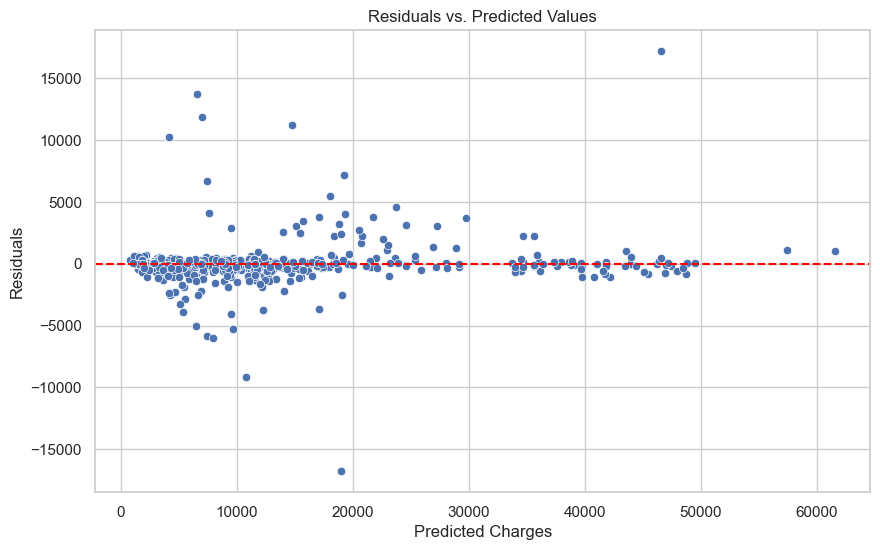

In [26]:
# Residuals
residuals = y_test - y_pred_best_xgb

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_best_xgb, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()


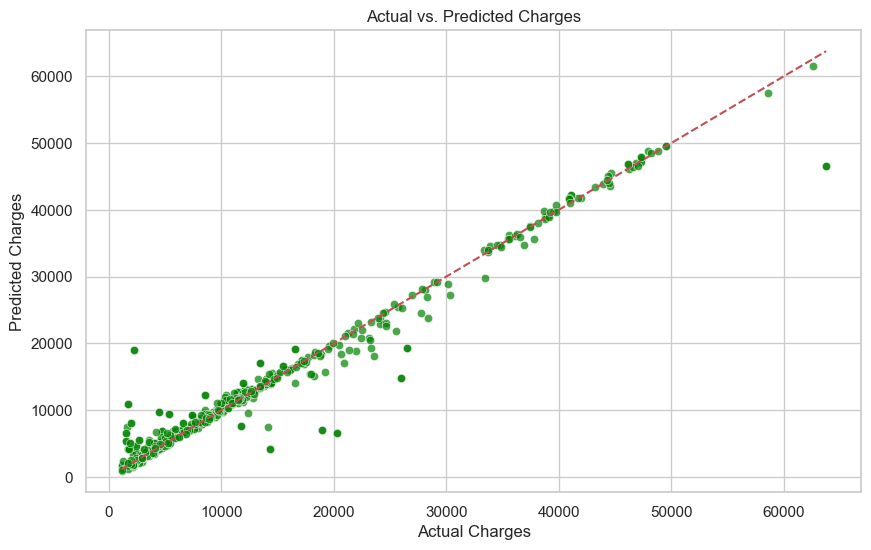

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_best_xgb, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


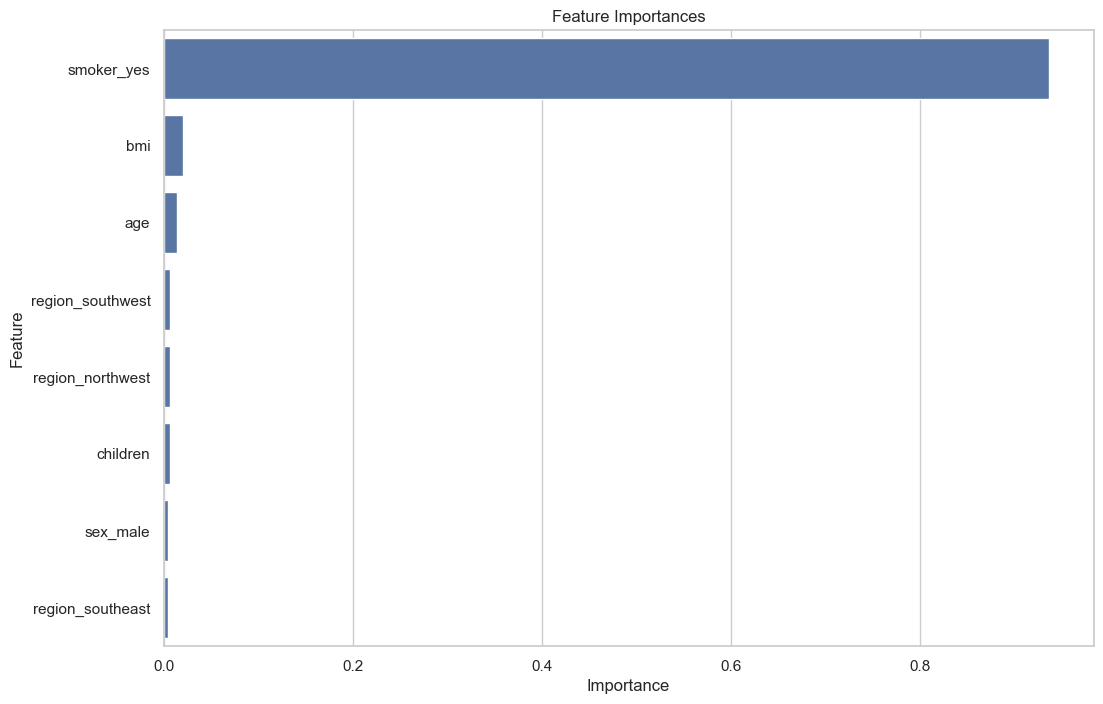

In [28]:
# Extract feature names after preprocessing
preprocessor.fit(X_train)
feature_names_num = numerical_features
feature_names_cat = best_xgb.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = list(feature_names_num) + list(feature_names_cat)

# Get feature importances
importances = best_xgb.named_steps['regressor'].feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [29]:
# Save the trained pipeline
joblib.dump(best_xgb, 'best_xgb_insurance_model.pkl')
print("Model saved as 'best_xgb_insurance_model.pkl'")


Model saved as 'best_xgb_insurance_model.pkl'


In [30]:
# Create a DataFrame with actual and predicted charges
predictions_df = pd.DataFrame({
    'Actual Charges': y_test,
    'Predicted Charges': y_pred_best_xgb
})

# Save to CSV
predictions_df.to_csv('insurance_predictions.csv', index=False)
print("Predictions saved as 'insurance_predictions.csv'")


Predictions saved as 'insurance_predictions.csv'


In [32]:
# Load the saved model
loaded_model = joblib.load('best_xgb_insurance_model.pkl')

# Create a new sample data point
new_data = pd.DataFrame({
    'age': [20],
    'sex': ['female'],
    'bmi': [25.0],
    'children': [2],
    'smoker': ['yes'],
    'region': ['southeast']
})

# Predict the insurance cost
predicted_charge = loaded_model.predict(new_data)
print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $19800.45
